In [1]:
#importar as libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Para Treino e teste
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

#normalização 
from sklearn.preprocessing import MinMaxScaler

#validação cruzada estratificada
from sklearn.model_selection import StratifiedKFold

#modelo de regressao logistica
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold


# Reamostragem dos dados

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

import numpy as np
from numpy import random

# melhorar a visualização
%matplotlib inline
mpl.style.use('ggplot')
plt.style.use('fivethirtyeight')
sns.set(context='notebook', palette='dark', color_codes=True)

#Modelos
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

# métricas de avaliação
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix, auc, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

# Reamostragem dos dados

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler

# outras
import time
import pickle
import warnings
from scipy import interp
from pprint import pprint
from scipy.stats import norm
from collections import Counter
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

# melhorar a visualização
%matplotlib inline
mpl.style.use('ggplot')
plt.style.use('fivethirtyeight')
sns.set(context='notebook', palette='dark', color_codes=True)

# mesagens de warning
warnings.filterwarnings("ignore")





In [3]:
#Importando o conjunto de dados, ignorando a primeira coluna Unnamed: 0

df = pd.read_csv("dataset.csv", index_col = 0)

In [4]:
#Avaliando as colunas e dados

df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
#Verificando qual o tamanho da base
df.shape

(114000, 20)

In [6]:
#Verificando o nome de todas as colunas
df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [7]:
    #Conhecendo melhor as informações da base

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [8]:
#Avaliando as informações númericas
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [9]:
#Renomenando as colunas

df = df.rename(columns={'track_id':'Id', 
                        'artists' :'Artista',
                        'album_name': 'Nome_Album', 
                        'track_name':'Nome_Faixa',
                        'popularity':'Popularidade',
                        'duration_ms':'Duracao_ms', 
                        'explicit':'Letras_explicitas', 
                        'danceability':'Dancabilidade',
                        'energy':'Energia',
                        'key':'Key', 
                        'loudness':'sonoridade', 
                        'mode':'modo', 
                        'speechiness':'Fala', 
                        'acousticness':'Acustica',
                        'instrumentalness':'Instrumentalidade',
                        'liveness':'Vivacidade', 
                        'valence':'Valecia', 
                        'tempo':'Tempo', 
                        'time_signature':'Tempo_Compasso'})

In [10]:
#Armazenando informações duplicadas
df_duplicados = df[df.duplicated(keep=False)]
df_duplicados.head()

,Id,Artista,Nome_Album,Nome_Faixa,Popularidade,Duracao_ms,Letras_explicitas,Dancabilidade,Energia,Key,sonoridade,modo,Fala,Acustica,Instrumentalidade,Vivacidade,Valecia,Tempo,Tempo_Compasso,track_genre
1874,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,0,-7.544,1,0.0438,0.238000,0.860000,0.0571,0.843,90.522,4,afrobeat
1925,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,0,-7.544,1,0.0438,0.238000,0.860000,0.0571,0.843,90.522,4,afrobeat
2109,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.900,11,-3.674,1,0.0499,0.116000,0.000017,0.1190,0.599,104.655,4,alt-rock
2155,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.900,11,-3.674,1,0.0499,0.116000,0.000017,0.1190,0.599,104.655,4,alt-rock
3683,7mULVp0DJrI2Nd6GesLvxn,Joy Division,Timeless Rock Hits,Love Will Tear Us Apart,0,204621,False,0.524,0.902,2,-8.662,1,0.0368,0.000989,0.695000,0.1370,0.907,146.833,4,alternative


In [11]:
#criar um novo dataframe com dados unicos excluindo os duplicados
df_music = df.drop_duplicates().copy()

In [12]:
#Avaliando as informações númericas sem informações duplicadas
df_music.describe()

,Popularidade,Duracao_ms,Dancabilidade,Energia,Key,sonoridade,modo,Fala,Acustica,Instrumentalidade,Vivacidade,Valecia,Tempo,Tempo_Compasso
count,113550.000000,1.135500e+05,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000
mean,33.324139,2.280794e+05,0.567031,0.642090,5.309467,-8.243419,0.637860,0.084674,0.314067,0.155702,0.213611,0.474207,122.175888,3.904218
std,22.283976,1.064148e+05,0.173408,0.251052,3.560134,5.011401,0.480621,0.105761,0.331907,0.309216,0.190461,0.259204,29.972861,0.432115
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.741802e+05,0.456000,0.473000,2.000000,-9.997750,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.296500,4.000000
50%,35.000000,2.130000e+05,0.580000,0.685000,5.000000,-6.997000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.020000,4.000000
75%,50.000000,2.615878e+05,0.695000,0.854000,8.000000,-5.001000,1.000000,0.084500,0.596000,0.048675,0.273000,0.683000,140.073750,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [13]:
#Veirificando valores nulos
#Não há valores nulos relevantes 

df_music.isnull().sum()

Id                   0
Artista              1
Nome_Album           1
Nome_Faixa           1
Popularidade         0
Duracao_ms           0
Letras_explicitas    0
Dancabilidade        0
Energia              0
Key                  0
sonoridade           0
modo                 0
Fala                 0
Acustica             0
Instrumentalidade    0
Vivacidade           0
Valecia              0
Tempo                0
Tempo_Compasso       0
track_genre          0
dtype: int64

In [14]:
#Excluindo informações nulas
df_music.dropna(inplace=True)

In [15]:
df_music.isnull().sum()

Id                   0
Artista              0
Nome_Album           0
Nome_Faixa           0
Popularidade         0
Duracao_ms           0
Letras_explicitas    0
Dancabilidade        0
Energia              0
Key                  0
sonoridade           0
modo                 0
Fala                 0
Acustica             0
Instrumentalidade    0
Vivacidade           0
Valecia              0
Tempo                0
Tempo_Compasso       0
track_genre          0
dtype: int64

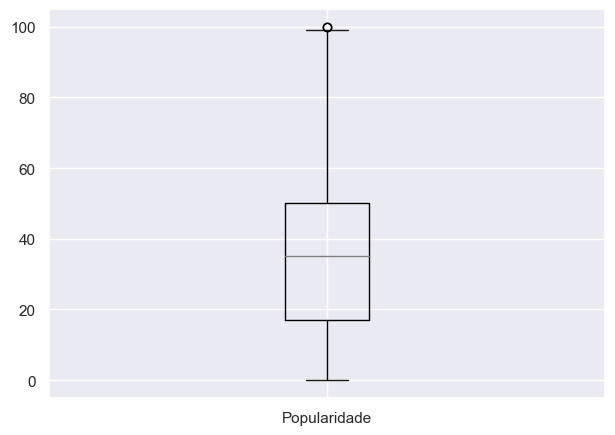

In [16]:
#Avaliando os dados de Popularidade
df_music.boxplot(column='Popularidade')

# Exibir o gráfico
plt.show()

In [17]:

#Adcionando uma coluna para contagem 

df_music['Qtd'] = 1

In [18]:
df_music.head()

,Id,Artista,Nome_Album,Nome_Faixa,Popularidade,Duracao_ms,Letras_explicitas,Dancabilidade,Energia,Key,...,modo,Fala,Acustica,Instrumentalidade,Vivacidade,Valecia,Tempo,Tempo_Compasso,track_genre,Qtd
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,1
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,1
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,1
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,1
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,1


In [19]:
# Top 10: Quantas vezes uma musica aparece nas informações e media da popularidade?  


musicas_qtd = df_music.groupby('Nome_Faixa').agg({'Qtd': 'sum', 'Popularidade': 'mean'}).sort_values(by=['Qtd'], ascending=False)
musicas_qtd.head(10)

,Qtd,Popularidade
Nome_Faixa,,
Run Rudolph Run,151,0.423841
Halloween,88,2.136364
Frosty The Snowman,80,0.150000
Little Saint Nick - 1991 Remix,74,0.013514
Christmas Time,72,0.083333
Last Last,70,2.571429
CÓMO SE SIENTE - Remix,64,2.890625
Sleigh Ride,61,0.114754
X ÚLTIMA VEZ,57,5.912281


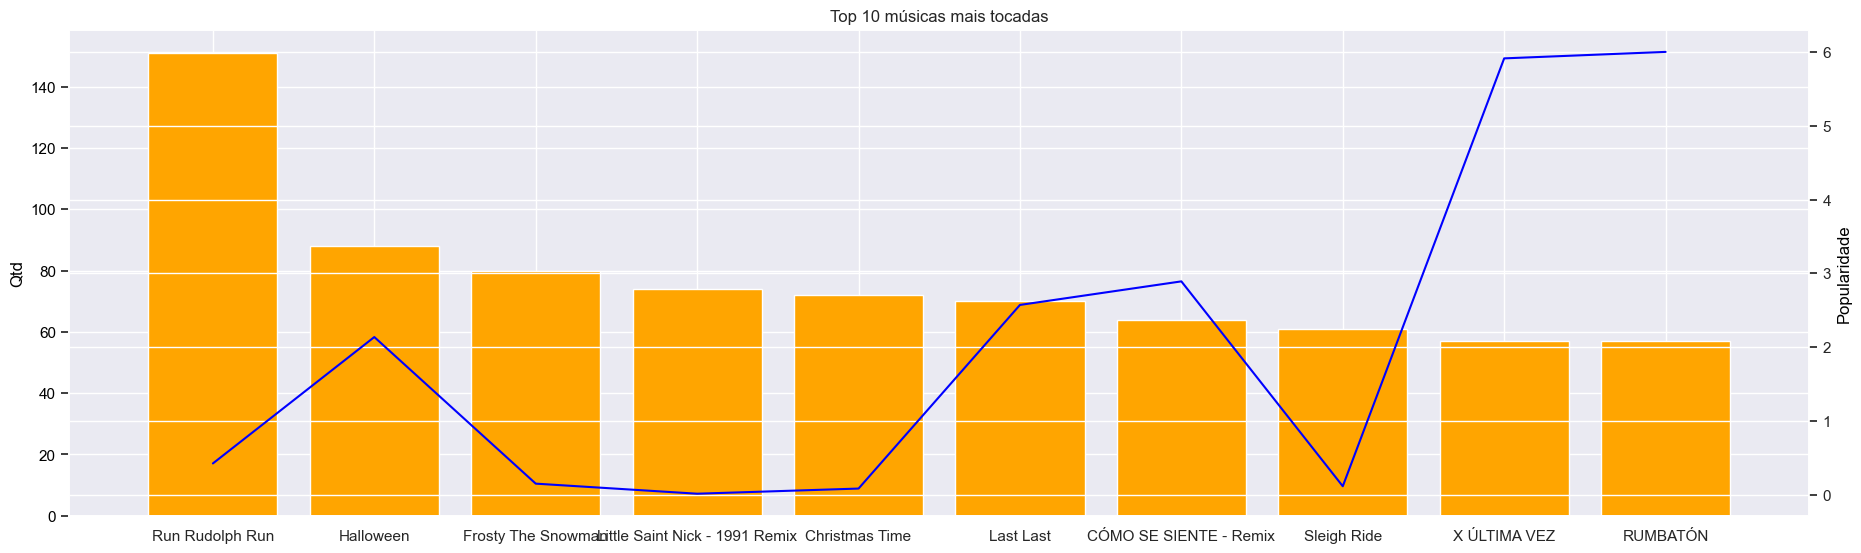

In [20]:
fig, ax1 = plt.subplots(figsize=(20,6))

# Gráfico de barras com a quantidade de cada música
ax1.bar(musicas_qtd.index[:10], musicas_qtd['Qtd'][:10], color='orange')
ax1.set_ylabel('Qtd', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Gráfico de linha com a popularidade média
ax2 = ax1.twinx()
ax2.plot(musicas_qtd.index[:10], musicas_qtd['Popularidade'][:10], color='blue')
ax2.set_ylabel('Popularidade', color='black')
ax2.tick_params(axis='x', labelcolor='black')

# Definindo o título do gráfico
plt.title('Top 10 músicas mais tocadas')

# Exibindo o gráfico
plt.show()

In [21]:
# Top 10: Quais as musicas mais populares

musicas_popularidade = df_music.groupby('Nome_Faixa').agg({'Qtd': 'sum', 'Popularidade': 'mean'}).sort_values(by=['Popularidade'], ascending=False)
musicas_popularidade.head(10)


# as musicas que aparecem mais não estão relacionadas com a popularidade média, quantidade não repetida

,Qtd,Popularidade
Nome_Faixa,,
Unholy (feat. Kim Petras),2,100.0
"Quevedo: Bzrp Music Sessions, Vol. 52",1,99.0
La Bachata,4,98.0
Me Porto Bonito,4,97.0
Tití Me Preguntó,4,97.0
Efecto,4,95.5
Ojitos Lindos,4,94.5
Moscow Mule,4,94.0
CUFF IT,1,93.0


In [22]:
# Top 10 artistas: quantas vezes um artista aparece nas informações? 


artista_qtd = df_music.groupby('Artista').agg({'Qtd': 'sum', 'Popularidade': 'mean'}).sort_values(by=['Qtd'], ascending=False)
artista_qtd.head(10)

,Qtd,Popularidade
Artista,,
The Beatles,279,61.007168
George Jones,260,16.561538
Stevie Wonder,235,1.068085
Linkin Park,224,56.071429
Ella Fitzgerald,221,0.737557
Prateek Kuhad,217,46.331797
Feid,201,10.114428
Chuck Berry,190,7.873684
Håkan Hellström,183,31.486339


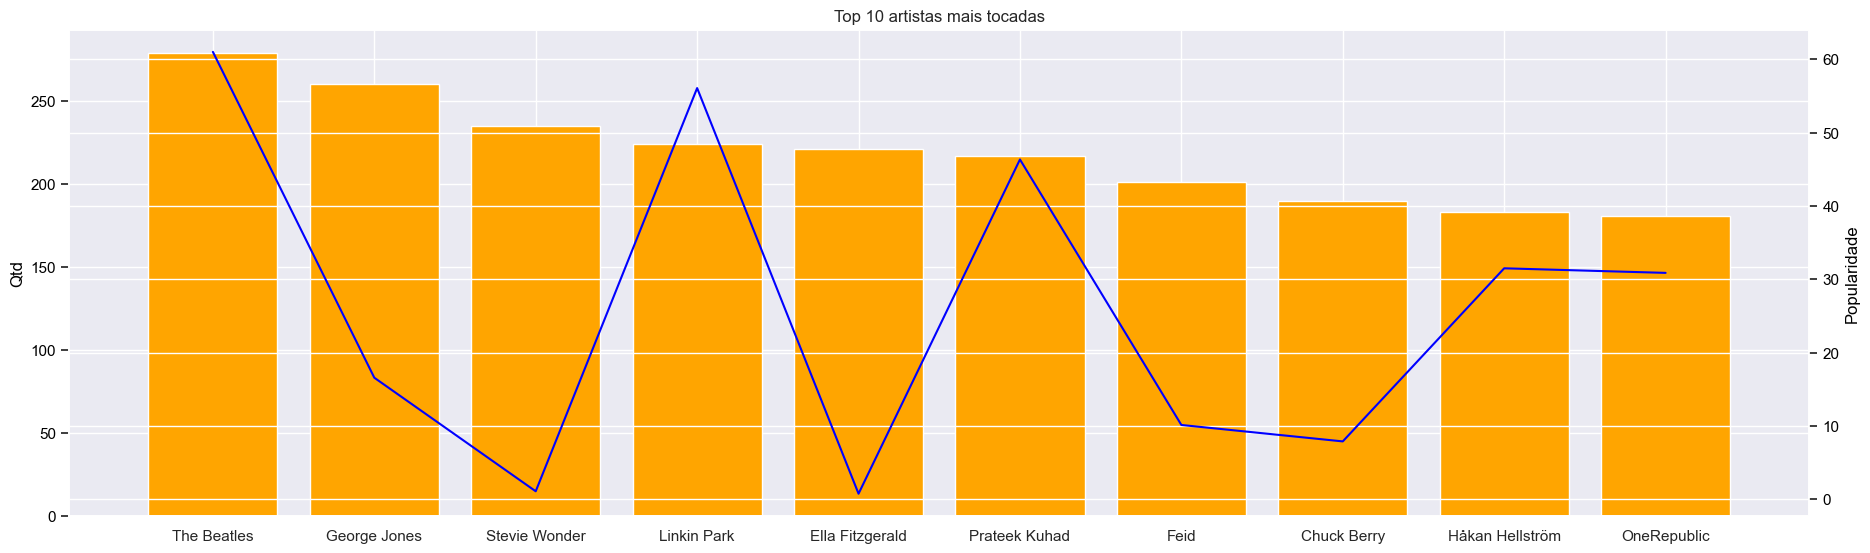

In [23]:
fig, ax1 = plt.subplots(figsize=(20,6))

# Gráfico de barras com a quantidade de cada música
ax1.bar(artista_qtd.index[:10], artista_qtd['Qtd'][:10], color='orange')
ax1.set_ylabel('Qtd', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Gráfico de linha com a popularidade média
ax2 = ax1.twinx()
ax2.plot(artista_qtd.index[:10], artista_qtd['Popularidade'][:10], color='blue')
ax2.set_ylabel('Popularidade', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Definindo o título do gráfico
plt.title('Top 10 artistas mais tocadas')

# Exibindo o gráfico
plt.show()

In [24]:
# Top 10: Quaisos artistas mais populares

artista_popularidade = df_music.groupby('Artista').agg({'Qtd': 'sum', 'Popularidade': 'mean'}).sort_values(by=['Popularidade'], ascending=False)
artista_popularidade.head(10)

#a média popularidade nao esta relacionada a quantidade de vezes que o artista aparece

,Qtd,Popularidade
Artista,,
Sam Smith;Kim Petras,2,100.0
Bizarrap;Quevedo,1,99.0
Manuel Turizo,4,98.0
Bad Bunny;Chencho Corleone,4,97.0
Bad Bunny;Bomba Estéreo,4,94.5
Joji,1,94.0
Beyoncé,1,93.0
Harry Styles,3,92.0
Rema;Selena Gomez,1,92.0


In [25]:
#Quais os sons mais longos
long_songs = df_music.groupby('Nome_Faixa').agg({'Duracao_ms': 'mean', 'Popularidade': 'mean'}).sort_values(by=['Duracao_ms'], ascending=False)
long_songs.head(10)


,Duracao_ms,Popularidade
Nome_Faixa,,
Unity (Voyage Mix) Pt. 1,5237295.0,35.0
Crossing Wires 002 - Continuous DJ Mix,4789026.0,11.0
The Lab 03 - Continuous DJ Mix Part 1,4730302.0,8.0
Amnesia Ibiza Underground 10 DJ Mix,4563897.0,17.0
House of Om - Mark Farina - Continuous Mix,4447520.0,11.0
Live In Tokyo - Continuous Mix,4339826.0,11.0
Greenhouse Construction,4334721.0,12.0
"NQ State of Mind, Vol. 1 - Continuous DJ Mix",4246206.0,15.0
Ocean Waves Sounds,4120258.0,39.0


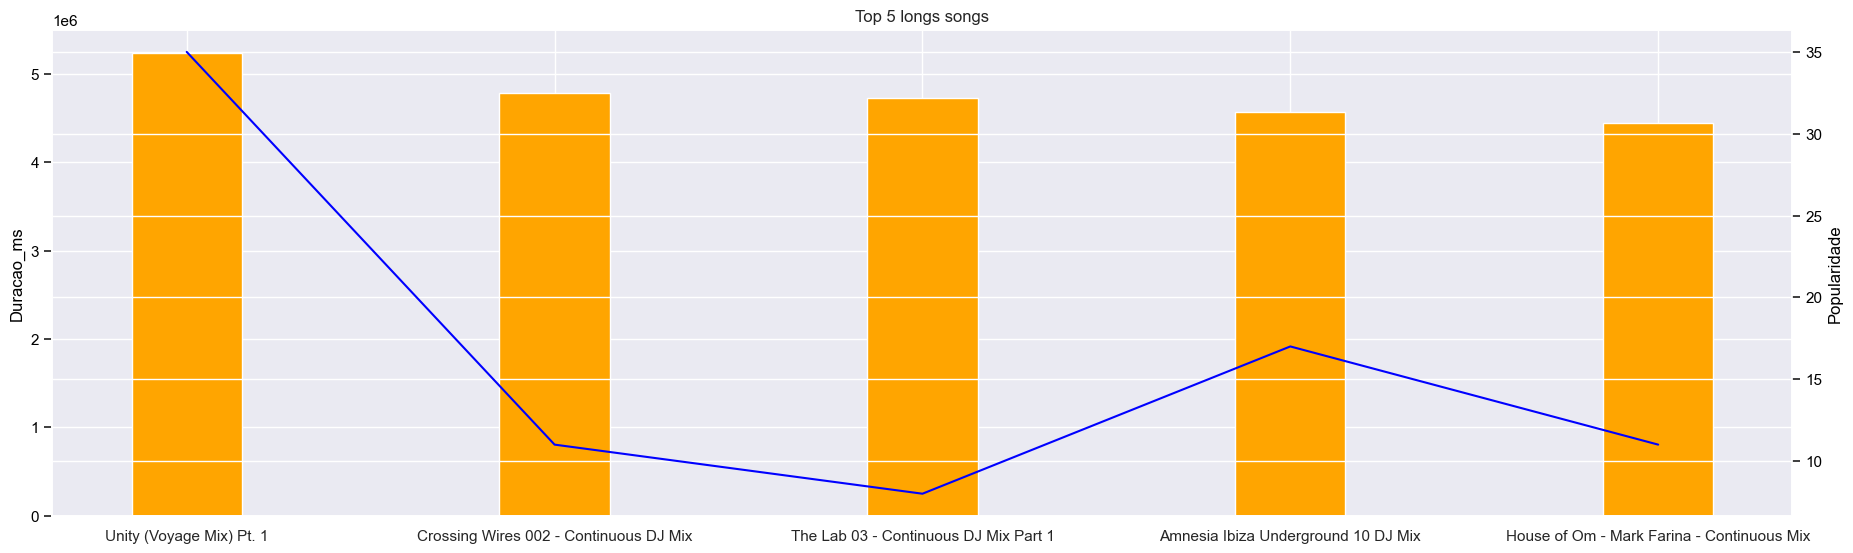

In [26]:
fig, ax1 = plt.subplots(figsize=(20,6))

# Gráfico de barras com a quantidade de cada música
ax1.bar(long_songs.index[:5], long_songs['Duracao_ms'][:5], width=0.3, color='orange')
ax1.set_ylabel('Duracao_ms', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Gráfico de linha com a popularidade média
ax2 = ax1.twinx()
ax2.plot(long_songs.index[:5], long_songs['Popularidade'][:5], color='blue')
ax2.set_ylabel('Popularidade', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Definindo o título do gráfico
plt.title('Top 5 longs songs')

# Exibindo o gráfico
plt.show()

In [27]:
# quais os generos mais populares? 



genre_popularidade = df_music.groupby('track_genre').agg({'Qtd': 'sum', 'Popularidade': 'mean'}).sort_values(by=['Popularidade'], ascending=False)
genre_popularidade.head(10)

#aqui avalia-se qual a media da popularidade por genero

,Qtd,Popularidade
track_genre,,
pop-film,999,59.280280
k-pop,998,56.963928
chill,999,53.704705
sad,1000,52.379000
grunge,999,49.582583
indian,999,49.528529
anime,999,48.766767
emo,1000,48.128000
pop,993,47.903323


In [28]:
trend_genre = df_music[["track_genre", "Popularidade"]].sort_values(by="Popularidade", ascending=False)[:5]
trend_genre 
# um dos generos aqui tem a maior popularidade

,track_genre,Popularidade
81051,pop,100
20001,dance,100
51664,hip-hop,99
68303,latino,98
81210,pop,98


In [29]:
musicas_popularidade = df_music.groupby('Nome_Faixa').agg({'Qtd': 'sum', 'Popularidade': 'mean'}).sort_values(by=['Popularidade'], ascending=False)
musicas_popularidade.head(10)


,Qtd,Popularidade
Nome_Faixa,,
Unholy (feat. Kim Petras),2,100.0
"Quevedo: Bzrp Music Sessions, Vol. 52",1,99.0
La Bachata,4,98.0
Me Porto Bonito,4,97.0
Tití Me Preguntó,4,97.0
Efecto,4,95.5
Ojitos Lindos,4,94.5
Moscow Mule,4,94.0
CUFF IT,1,93.0


In [30]:
dance = df_music.groupby('Nome_Faixa').agg({'Qtd': 'sum', 'Dancabilidade': 'mean'}).sort_values(by=['Dancabilidade'], ascending=False)
dance.head(10)

,Qtd,Dancabilidade
Nome_Faixa,,
Sol Clap,1,0.985
Medicaid Baby,1,0.984
Daily Routines,1,0.982
"Featuring Mixx Master Lee, Red Rum & J. Smoov (Funky Mix)",1,0.981
Plastik Fantastik,1,0.980
Dancing in My Room,1,0.980
The Underground - Hatiras Remix,1,0.979
The Soccer Song (Football Song),1,0.979
Casper Cha-Cha Slide (Live Platinum Band),1,0.978


In [31]:
danceable = df_music[["Nome_Faixa", "Artista", "Dancabilidade"]].sort_values(by="Dancabilidade", ascending=False)[:5]
danceable

,Nome_Faixa,Artista,Dancabilidade
111635,Sol Clap,Quantic,0.985
66576,Medicaid Baby,That Girl Lay Lay,0.984
24916,Inspiration,Delano Smith,0.983
73374,Daily Routines,Oliver Schories,0.982
66793,"Featuring Mixx Master Lee, Red Rum & J. Smoov ...",Mixx Master Lee,0.981


In [32]:
#Convertendo a popularidade em uma classe binaria 
df_music['popular'] = df_music['Popularidade'].apply(lambda valor: 0 if valor <70 else 1)

In [33]:
df_music.head()

,Id,Artista,Nome_Album,Nome_Faixa,Popularidade,Duracao_ms,Letras_explicitas,Dancabilidade,Energia,Key,...,Fala,Acustica,Instrumentalidade,Vivacidade,Valecia,Tempo,Tempo_Compasso,track_genre,Qtd,popular
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,1,1
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,1,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,1,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,1,1
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,1,1


In [34]:
df_music.describe()

,Popularidade,Duracao_ms,Dancabilidade,Energia,Key,sonoridade,modo,Fala,Acustica,Instrumentalidade,Vivacidade,Valecia,Tempo,Tempo_Compasso,Qtd,popular
count,113549.000000,1.135490e+05,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.0,113549.000000
mean,33.324433,2.280814e+05,0.567031,0.642091,5.309452,-8.243408,0.637866,0.084674,0.314064,0.155703,0.213613,0.474205,122.175745,3.904218,1.0,0.048155
std,22.283855,1.064131e+05,0.173409,0.251053,3.560147,5.011422,0.480620,0.105762,0.331906,0.309217,0.190462,0.259204,29.972954,0.432117,0.0,0.214095
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,17.000000,1.741840e+05,0.456000,0.473000,2.000000,-9.998000,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.296000,4.000000,1.0,0.000000
50%,35.000000,2.130000e+05,0.580000,0.685000,5.000000,-6.997000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.020000,4.000000,1.0,0.000000
75%,50.000000,2.615880e+05,0.695000,0.854000,8.000000,-5.001000,1.000000,0.084500,0.596000,0.048700,0.273000,0.683000,140.074000,4.000000,1.0,0.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,1.0,1.000000


In [35]:
df_music.columns

Index(['Id', 'Artista', 'Nome_Album', 'Nome_Faixa', 'Popularidade',
       'Duracao_ms', 'Letras_explicitas', 'Dancabilidade', 'Energia', 'Key',
       'sonoridade', 'modo', 'Fala', 'Acustica', 'Instrumentalidade',
       'Vivacidade', 'Valecia', 'Tempo', 'Tempo_Compasso', 'track_genre',
       'Qtd', 'popular'],
      dtype='object')

In [36]:
df_music = df_music[['Id', 'Artista', 'Nome_Album', 'Nome_Faixa', 'Popularidade',
       'Duracao_ms', 'Letras_explicitas', 'Dancabilidade', 'Energia', 'Key',
       'sonoridade', 'modo', 'Fala', 'Acustica', 'Instrumentalidade',
       'Vivacidade', 'Valecia', 'Tempo', 'Tempo_Compasso', 'track_genre','popular']]

In [37]:
#correlação

df_music.corr()

,Popularidade,Duracao_ms,Letras_explicitas,Dancabilidade,Energia,Key,sonoridade,modo,Fala,Acustica,Instrumentalidade,Vivacidade,Valecia,Tempo,Tempo_Compasso,popular
Popularidade,1.000000,-0.007928,0.043938,0.034407,-0.002447,-0.004167,0.047368,-0.015009,-0.045463,-0.022356,-0.094718,-0.005668,-0.041097,0.012187,0.030567,0.429662
Duracao_ms,-0.007928,1.000000,-0.066005,-0.074117,0.058160,0.008519,-0.004233,-0.035961,-0.063194,-0.103676,0.125301,0.010199,-0.154795,0.024312,0.018351,-0.020392
Letras_explicitas,0.043938,-0.066005,1.000000,0.122179,0.096256,0.004843,0.107988,-0.037387,0.307455,-0.093748,-0.103169,0.032367,-0.003779,-0.003097,0.038234,0.060879
Dancabilidade,0.034407,-0.074117,0.122179,1.000000,0.131694,0.036546,0.256559,-0.069783,0.108236,-0.169181,-0.183974,-0.131651,0.476755,-0.051517,0.207370,0.063599
Energia,-0.002447,0.058160,0.096256,0.131694,1.000000,0.048047,0.760624,-0.079331,0.141976,-0.732747,-0.179967,0.184810,0.258451,0.247361,0.186671,0.025914
Key,-0.004167,0.008519,0.004843,0.036546,0.048047,1.000000,0.038359,-0.135871,0.020820,-0.041124,-0.006819,-0.001518,0.034233,0.010903,0.015122,0.001131
sonoridade,0.047368,-0.004233,0.107988,0.256559,0.760624,0.038359,1.000000,-0.042074,0.060088,-0.588111,-0.432109,0.076792,0.279428,0.212181,0.191648,0.070901
modo,-0.015009,-0.035961,-0.037387,-0.069783,-0.079331,-0.135871,-0.042074,1.000000,-0.046773,0.096548,-0.050787,0.013900,0.021411,0.000371,-0.024365,-0.014794
Fala,-0.045463,-0.063194,0.307455,0.108236,0.141976,0.020820,0.060088,-0.046773,1.000000,-0.001378,-0.089214,0.205092,0.036393,0.017167,-0.000397,-0.019838
Acustica,-0.022356,-0.103676,-0.093748,-0.169181,-0.732747,-0.041124,-0.588111,0.096548,-0.001378,1.000000,0.102134,-0.020313,-0.106240,-0.207620,-0.175621,-0.062924


In [38]:
df_music.columns

Index(['Id', 'Artista', 'Nome_Album', 'Nome_Faixa', 'Popularidade',
       'Duracao_ms', 'Letras_explicitas', 'Dancabilidade', 'Energia', 'Key',
       'sonoridade', 'modo', 'Fala', 'Acustica', 'Instrumentalidade',
       'Vivacidade', 'Valecia', 'Tempo', 'Tempo_Compasso', 'track_genre',
       'popular'],
      dtype='object')

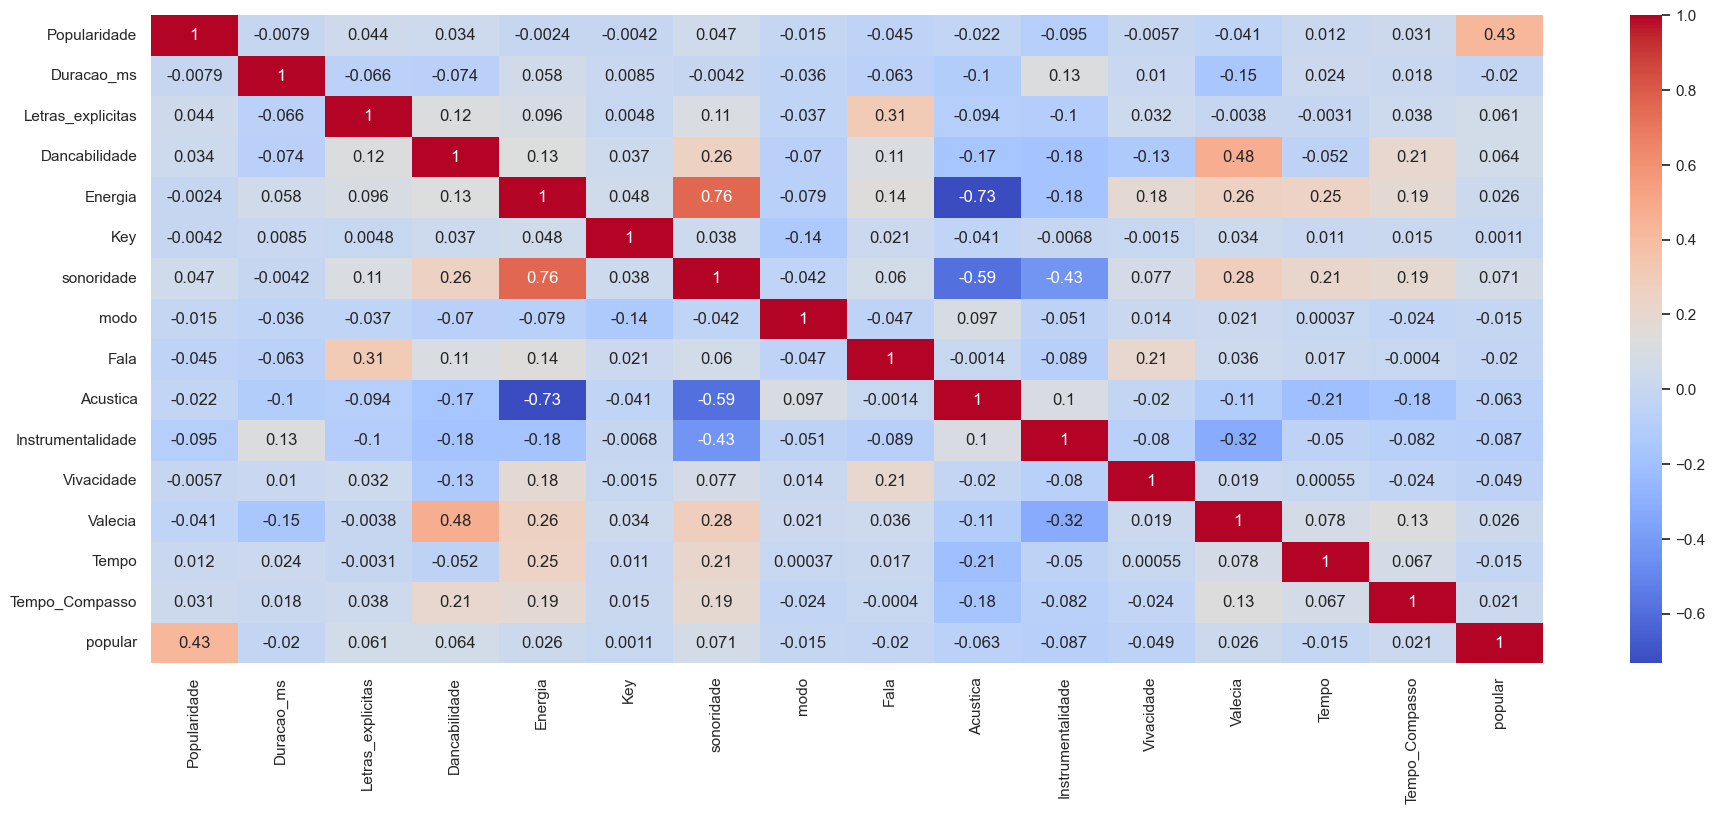

In [39]:
correlacao_2 = df_music.corr()

# Criar um mapa de calor da matriz de correlação usando Seaborn
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(correlacao_2, annot=True, cmap='coolwarm', ax=ax)

# Exibir o mapa de calor
plt.show()

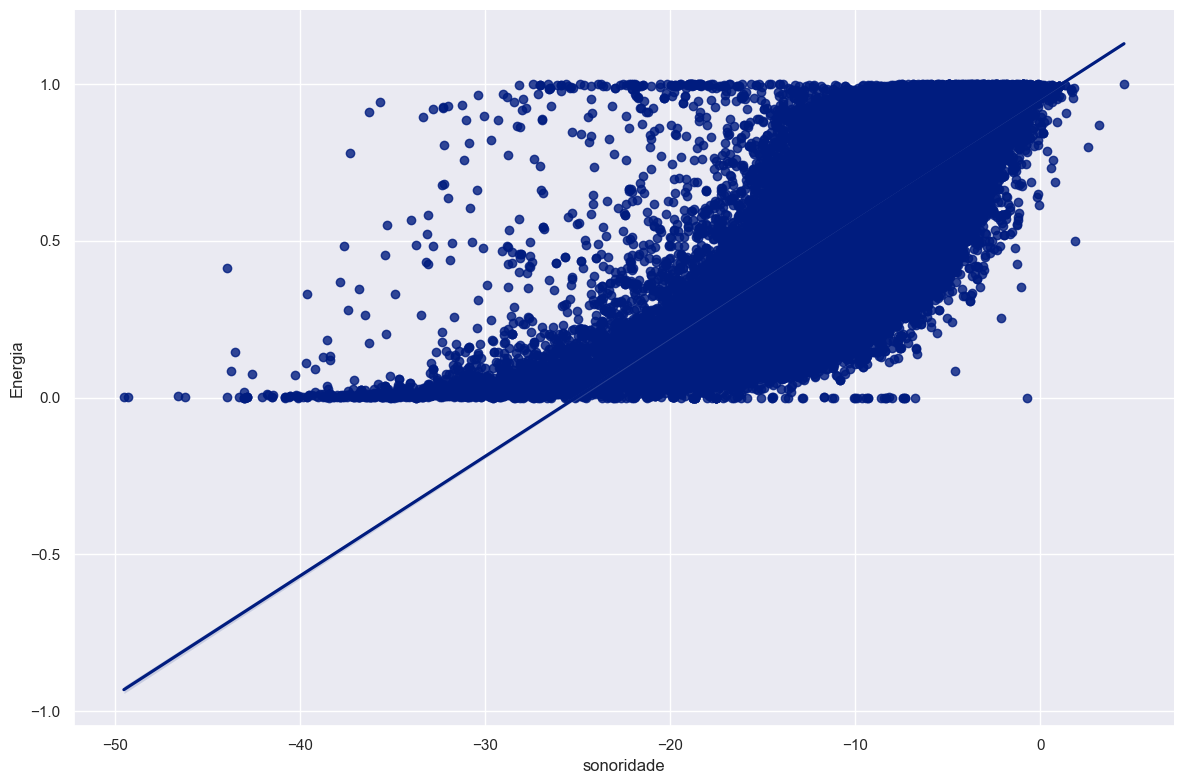

In [40]:
sns.lmplot(x='sonoridade', y='Energia', data=df_music, height=8, aspect=1.5)
                                                    
plt.show()

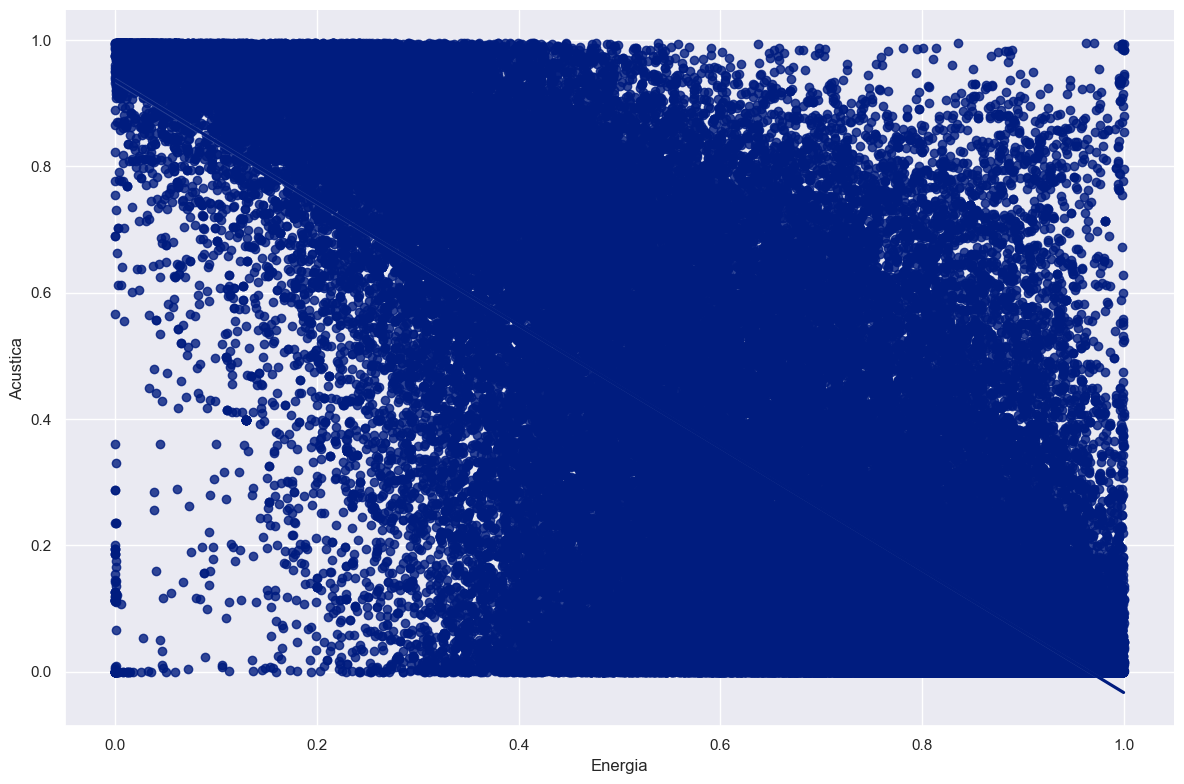

In [41]:
sns.lmplot(x='Energia', y='Acustica', data=df_music, height=8, aspect=1.5)

plt.show()

In [42]:
df_music.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113549 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Id                 113549 non-null  object 
 1   Artista            113549 non-null  object 
 2   Nome_Album         113549 non-null  object 
 3   Nome_Faixa         113549 non-null  object 
 4   Popularidade       113549 non-null  int64  
 5   Duracao_ms         113549 non-null  int64  
 6   Letras_explicitas  113549 non-null  bool   
 7   Dancabilidade      113549 non-null  float64
 8   Energia            113549 non-null  float64
 9   Key                113549 non-null  int64  
 10  sonoridade         113549 non-null  float64
 11  modo               113549 non-null  int64  
 12  Fala               113549 non-null  float64
 13  Acustica           113549 non-null  float64
 14  Instrumentalidade  113549 non-null  float64
 15  Vivacidade         113549 non-null  float64
 16  Va

In [43]:
df_quantitativo = df_music.select_dtypes(include=[np.number])

df_quantitativo.head()

,Popularidade,Duracao_ms,Dancabilidade,Energia,Key,sonoridade,modo,Fala,Acustica,Instrumentalidade,Vivacidade,Valecia,Tempo,Tempo_Compasso,popular
0,73,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,1
1,55,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0
2,57,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0
3,71,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,1
4,82,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,1


In [44]:
#Normalizar dados é um processo de transformação dos valores de uma variável para uma escala comum ou específica. 
#O objetivo da normalização é colocar os dados em uma faixa padronizada, geralmente entre 0 e 1, 
#ou em torno de um determinado intervalo, como -1 a 1.


scaler = MinMaxScaler()
df_qtativo_nm =pd.DataFrame(scaler.fit_transform(df_quantitativo), columns=df_quantitativo.columns)


In [45]:
df_qtativo_nm.head()

,Popularidade,Duracao_ms,Dancabilidade,Energia,Key,sonoridade,modo,Fala,Acustica,Instrumentalidade,Vivacidade,Valecia,Tempo,Tempo_Compasso,popular
0,0.73,0.042473,0.686294,0.4610,0.090909,0.791392,0.0,0.148187,0.032329,0.000001,0.3580,0.718593,0.361245,0.8,1.0
1,0.55,0.026971,0.426396,0.1660,0.090909,0.597377,1.0,0.079067,0.927711,0.000006,0.1010,0.268342,0.318397,0.8,0.0
2,0.57,0.038679,0.444670,0.3590,0.000000,0.736123,1.0,0.057720,0.210843,0.000000,0.1170,0.120603,0.313643,0.8,0.0
3,0.71,0.036978,0.270051,0.0596,0.000000,0.573701,1.0,0.037617,0.908635,0.000071,0.1320,0.143719,0.746758,0.6,1.0
4,0.82,0.036389,0.627411,0.4430,0.181818,0.737103,1.0,0.054508,0.470884,0.000000,0.0829,0.167839,0.492863,0.8,1.0


In [46]:
# Separando os dados em treino, validação e teste

#Os dados de treinamento - treinam o modelo 
#Os dados de teste - avaliar desempenho em dados Novos ( será utilizado 20%)
#Os dados de validação, são usados para ajustar os hiperparâmetros do modelo (parâmetros que melhoram o desempenho do modelo).

In [47]:
# Separando os dados para treino e teste

df_train, df_test = train_test_split(df_qtativo_nm, test_size=0.2, random_state=42, shuffle=True)

In [48]:
# visualizando as proporções da variável popular
df_train.popular.value_counts(normalize=True)

0.0    0.952146
1.0    0.047854
Name: popular, dtype: float64

In [49]:
#Os dados de teste - avaliar desempenho em dados Novos ( será utilizado 20%)
# visualizando as proporções da variável popular
df_test.popular.value_counts(normalize=True)

0.0    0.950638
1.0    0.049362
Name: popular, dtype: float64

In [50]:
#Os dados de treinamento - treinam o modelo 
df_train.columns


Index(['Popularidade', 'Duracao_ms', 'Dancabilidade', 'Energia', 'Key',
       'sonoridade', 'modo', 'Fala', 'Acustica', 'Instrumentalidade',
       'Vivacidade', 'Valecia', 'Tempo', 'Tempo_Compasso', 'popular'],
      dtype='object')

In [51]:
# dividindo X e y

X = df_train.drop('popular', axis=1)
y = df_train.popular

In [52]:
# separando os dados mantendo a porcentagem de amostras em cada classe
#O StratifiedKFold é um método de validação cruzada que mantém a proporção de cada classe na amostra original 
#durante o processo de divisão dos dados em k dobras. 
#Isso ajuda a evitar o problema de desbalanceamento de classes durante o treinamento e avaliação do modelo.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]


In [53]:
# checando as proporções da classe 1 na divisão
print(f'Dimensões: {X_train.shape, X_val.shape, y_train.shape, y_val.shape}\n')
print(f"Proporção do df_train para classe=1: {round(len(df_train[df_train.popular==1]) / df_train.shape[0], 4)}\n")
print(f"Proporção de X_train para classe=1:  {round(len(y_train[y_train==1]) / X_train.shape[0], 4)}")
print(f"Proporção de X_val para classe=1:    {round(len(y_val[y_val==1]) / X_val.shape[0], 4)}")

Dimensões: ((72672, 14), (18167, 14), (72672,), (18167,))

Proporção do df_train para classe=1: 0.0479

Proporção de X_train para classe=1:  0.0479
Proporção de X_val para classe=1:    0.0478


In [54]:
#Definindo o baseline

In [55]:
# Esta linha instancia o modelo de Regressão Logística. 
#É necessário instanciar o modelo antes de poder treiná-lo e usá-lo para prever novos dados.

logReg = LogisticRegression()

# Esta linha treina o modelo com os dados de treino. X_train contém as variáveis independentes (ou seja, as características) 
# y_train contém as variáveis dependentes (ou seja, os rótulos)  Durante o treinamento, 
#o modelo ajusta os parâmetros internos para minimizar a função de custo
logReg.fit(X_train, y_train)

# Prevendo nos dados de treino l. Esta linha faz uma previsão com o modelo treinado nos dados de treino. 
#contém as previsões para cada amostra dos dados de treino.
y_pred_base_train = logReg.predict(X_train)

# Prevendo nos dados de validação.Esta linha faz uma previsão com o modelo treinado nos dados de validação. 
#A variável y_pred_base_val contém as previsões para cada amostra dos dados de validação.
y_pred_base_val = logReg.predict(X_val)

In [56]:
#retorna os coeficientes do modelo de Regressão Logística treinado como uma lista, 
#onde cada elemento da lista corresponde ao coeficiente de uma variável independente.
logReg.coef_.tolist()[0]

[40.2515659595727,
 0.20394807957691374,
 0.056888603863465004,
 -0.32566387573919503,
 -0.08912298112366358,
 0.574057732477877,
 0.05031523639238358,
 -0.6466940428304448,
 -0.4150888324134355,
 -0.41692217730751985,
 -0.2099239373243558,
 0.09567778148329042,
 -0.42766217541631213,
 0.17295171088794795]

In [57]:
df_coef = df_qtativo_nm.drop(columns='popular')
df_coef.columns

Index(['Popularidade', 'Duracao_ms', 'Dancabilidade', 'Energia', 'Key',
       'sonoridade', 'modo', 'Fala', 'Acustica', 'Instrumentalidade',
       'Vivacidade', 'Valecia', 'Tempo', 'Tempo_Compasso'],
      dtype='object')

In [58]:
data = {
    "Features": df_coef.columns,
    "Coef": logReg.coef_.tolist()[0]
}

df = pd.DataFrame(data)
df

,Features,Coef
0,Popularidade,40.251566
1,Duracao_ms,0.203948
2,Dancabilidade,0.056889
3,Energia,-0.325664
4,Key,-0.089123
5,sonoridade,0.574058
6,modo,0.050315
7,Fala,-0.646694
8,Acustica,-0.415089
9,Instrumentalidade,-0.416922


In [60]:

print('Nos dados de TREINO:')

print('---' * 20)
print('Modelo:    Regressão Logística (baseline)\n')
print(f"accuracy:  {accuracy_score(y_train, y_pred_base_train)}")
print(f"precision: {precision_score(y_train, y_pred_base_train)}")
print(f"recall:    {recall_score(y_train, y_pred_base_train)}")
print(f"f1:        {f1_score(y_train, y_pred_base_train)}")
print()
print('---' * 20)
print('---' * 20)
print()
print('Nos dados de VALIDAÇÃO:')
print('---' * 20)
print('Modelo:    Regressão Logística (baseline)\n')
print(f"accuracy:  {accuracy_score(y_val, y_pred_base_val)}")
print(f"precision: {precision_score(y_val, y_pred_base_val)}")
print(f"recall:    {recall_score(y_val, y_pred_base_val)}")
print(f"f1:        {f1_score(y_val, y_pred_base_val)}")
print('---' * 20)

Nos dados de TREINO:
------------------------------------------------------------
Modelo:    Regressão Logística (baseline)

accuracy:  0.9956929766622633
precision: 1.0
recall:    0.9100057504312824
f1:        0.9528827337046516

------------------------------------------------------------
------------------------------------------------------------

Nos dados de VALIDAÇÃO:
------------------------------------------------------------
Modelo:    Regressão Logística (baseline)

accuracy:  0.9954312764903396
precision: 1.0
recall:    0.904487917146145
f1:        0.9498489425981873
------------------------------------------------------------
